## Stage 1:

1) Calculate % growth of funding between year 2008 & 2009.

2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [31]:
data = pd.read_excel('2010 Federal STEM Education Inventory Data Set.xls',header=1)

## Analysing variable names on data.world,I renamed the columns as:
### if columns are like col, Unnamed.. , Unnamed.. , then  they are renamed as col, col 1, col 2

In [38]:
for i in data.columns:
    if i[:7]=="Unnamed":
        data.rename(columns={i:j+" "+str(k)},inplace=True)
        k=k+1
    else:
        j=i
        k=1      

In [49]:
data['Growth'] = ((data['C2) Funding FY2009'] - data['C1) Funding FY2008']) / data['C1) Funding FY2008']) * 100
data['target'] = (data['Growth'] >= 0).astype(int)

In [51]:
data.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Y3) Process or Implementation Evaluation Type,Y3) Process or Implementation Evaluation Type 1,Y3) Process or Implementation Evaluation Type 2,Y4) Portfolio Evaluation/Review Type,Y4) Portfolio Evaluation/Review Type 1,Y4) Portfolio Evaluation/Review Type 2,Y5) Expert Review Type,Y5) Expert Review Type 1,Growth,target
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,37.213740,1
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,157.986871,1
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,68.098160,1


In [52]:
data.to_csv('data.csv')

##  Distribution of % growth for each ID

<Container object of 253 artists>

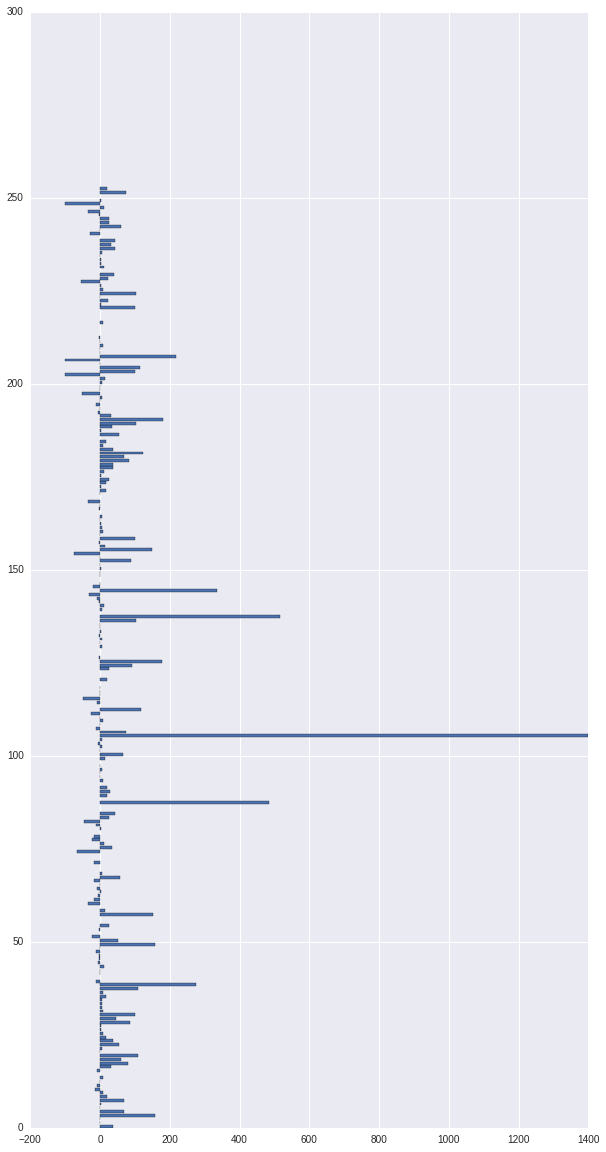

In [15]:
plt.figure(figsize=(10,20))
plt.barh(data.index, data['Growth'])